<h4 align="right">9th of March 2020</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 6: Optimization</h2> <br>

# Different optimizers

![alt text](https://i.pinimg.com/originals/5d/51/66/5d5166a3d3712e7c03af74b1ccacbeac.gif)

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [0]:
mnist = tf.keras.datasets.mnist.load_data()

In [0]:
train, test = mnist
all_xtrain, all_Ytrain = train
xtrain = all_xtrain[:50000]
Ytrain = all_Ytrain[:50000]
xtest, Ytest = test
xtest = np.concatenate((xtest,all_xtrain[50000:]))
Ytest = np.concatenate((Ytest,all_Ytrain[50000:]))
xtrain = xtrain.reshape(-1,28*28) / 255
xtest = xtest.reshape(-1,28*28) / 255
print(xtrain.shape)
print(xtest.shape)

(50000, 784)
(20000, 784)


In [0]:
enc = OneHotEncoder(sparse = False,categories='auto')
ytrain = enc.fit_transform(Ytrain.reshape(-1, 1))
ytest = enc.transform(Ytest.reshape(-1, 1))

In [0]:
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(500, activation = tf.nn.relu, kernel_initializer = keras.initializers.glorot_uniform(seed=1))(inp)
x = layers.Dense(125, activation = tf.nn.relu, kernel_initializer = keras.initializers.glorot_uniform(seed=1))(x)
out = layers.Dense(10, activation=tf.nn.softmax, kernel_initializer = keras.initializers.glorot_uniform(seed=1))(x)

In [0]:
model1 = keras.Model(inp,out)
model2 = keras.Model(inp,out)
model3 = keras.Model(inp,out)
model4 = keras.Model(inp,out)

## Stochastic Gradient Descent (SGD)

Of the optimizers profiled here, stochastic gradient descent uses the least memory for a given batch size.

In [0]:
start1 = time.clock()
optimizer = tf.keras.optimizers.SGD(0.01)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
epochs = 100
history1 = model1.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
end1 = time.clock() - start1

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 58us/sample - loss: 2.0541 - acc: 0.3889 - val_loss: 1.7637 - val_acc: 0.6396
Epoch 2/100
40000/40000 [==============================] - 2s 57us/sample - loss: 1.4963 - acc: 0.7110 - val_loss: 1.2579 - val_acc: 0.7585
Epoch 3/100
40000/40000 [==============================] - 2s 56us/sample - loss: 1.0704 - acc: 0.7878 - val_loss: 0.9296 - val_acc: 0.8089
Epoch 4/100
40000/40000 [==============================] - 2s 56us/sample - loss: 0.8213 - acc: 0.8218 - val_loss: 0.7477 - val_acc: 0.8322
Epoch 5/100
40000/40000 [==============================] - 2s 55us/sample - loss: 0.6802 - acc: 0.8440 - val_loss: 0.6402 - val_acc: 0.8454
Epoch 6/100
40000/40000 [==============================] - 2s 56us/sample - loss: 0.5925 - acc: 0.8579 - val_loss: 0.5708 - val_acc: 0.8553
Epoch 7/100
40000/40000 [==============================] - 2s 55us/sample - loss: 0.5336 - acc: 0.8679 - val_l

## Adagrad
individually adapts the learning rates of all model parameters by scaling them inversely proportional to the square root of the sum of all of their historical squared values

Empirically it has been found that—for training deep neural network models—the accumulation of squared gradients from the beginning of training can result in a premature and excessive decrease in the effective learning rate (stops the learning early).

In [0]:
start2 = time.clock()
optimizer = tf.keras.optimizers.Adagrad(0.01)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
epochs = 100
history2 = model2.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
end2 = time.clock() - start2

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/100
40000/40000 [==============================] - 2s 61us/sample - loss: 0.1546 - acc: 0.9562 - val_loss: 0.1918 - val_acc: 0.9422
Epoch 2/100
40000/40000 [==============================] - 2s 58us/sample - loss: 0.1513 - acc: 0.9569 - val_loss: 0.1905 - val_acc: 0.9445
Epoch 3/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1485 - acc: 0.9588 - val_loss: 0.1890 - val_acc: 0.9450
Epoch 4/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1455 - acc: 0.9597 - val_loss: 0.1865 - val_acc: 0.9449
Epoch 5/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1427 - acc: 0.9600 - val_loss: 0.1822 - val_acc: 0.9477
Epoch 6/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1397 - acc: 0.9607 - val_loss: 0.1785 - val_acc:

## RMSprop

In [0]:
start3 = time.clock()
optimizer = tf.keras.optimizers.RMSprop(0.01)
model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
epochs = 100
history3 = model3.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
end3 = time.clock() - start3

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 63us/sample - loss: 2.4547 - acc: 0.8340 - val_loss: 1.6999 - val_acc: 0.6881
Epoch 2/100
40000/40000 [==============================] - 2s 61us/sample - loss: 0.3604 - acc: 0.9182 - val_loss: 0.4230 - val_acc: 0.8920
Epoch 3/100
40000/40000 [==============================] - 2s 60us/sample - loss: 0.1659 - acc: 0.9510 - val_loss: 0.2076 - val_acc: 0.9430
Epoch 4/100
40000/40000 [==============================] - 2s 60us/sample - loss: 0.1212 - acc: 0.9647 - val_loss: 0.1550 - val_acc: 0.9591
Epoch 5/100
40000/40000 [==============================] - 2s 61us/sample - loss: 0.0976 - acc: 0.9728 - val_loss: 0.3500 - val_acc: 0.9253
Epoch 6/100
40000/40000 [==============================] - 3s 63us/sample - loss: 0.0731 - acc: 0.9779 - val_loss: 0.2045 - val_acc: 0.9529
Epoch 7/100
40000/40000 [==============================] - 2s 60us/sample - loss: 0.0668 - acc: 0.9804 - val_l

## Adam

In [0]:
start4 = time.clock()
optimizer = tf.keras.optimizers.Adam(0.01)
model4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
epochs = 100
history4 = model4.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
end4 = time.clock() - start2

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 61us/sample - loss: 0.0497 - acc: 0.9969 - val_loss: 1.5745 - val_acc: 0.9668
Epoch 2/100
40000/40000 [==============================] - 2s 58us/sample - loss: 0.0767 - acc: 0.9956 - val_loss: 1.6408 - val_acc: 0.9685
Epoch 3/100
40000/40000 [==============================] - 2s 57us/sample - loss: 0.0745 - acc: 0.9962 - val_loss: 1.4936 - val_acc: 0.9664
Epoch 4/100
40000/40000 [==============================] - 2s 57us/sample - loss: 0.0784 - acc: 0.9967 - val_loss: 1.2656 - val_acc: 0.9704
Epoch 5/100
40000/40000 [==============================] - 2s 58us/sample - loss: 0.0394 - acc: 0.9970 - val_loss: 1.2573 - val_acc: 0.9694
Epoch 6/100
40000/40000 [==============================] - 2s 57us/sample - loss: 0.0600 - acc: 0.9964 - val_loss: 1.1345 - val_acc: 0.9722
Epoch 7/100
40000/40000 [==============================] - 2s 57us/sample - loss: 0.0547 - acc: 0.9964 - val_l

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
  #plt.ylim([0.4,1.2])
  plt.legend()

In [0]:
def plot_historyAcc(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Accuracy')
  plt.ylim([0.4,1.2])
  plt.legend()

Using SGD, time consumed is 383.86218299999996 seconds


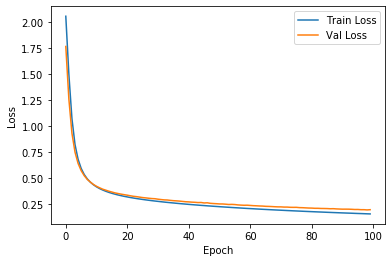

In [0]:
plot_history(history1)
print("Using SGD, time consumed is " + str(end1) + " seconds")

train accuracy is 0.956625Validation accuracy is: 0.9417


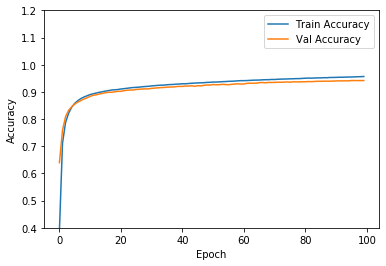

In [0]:
plot_historyAcc(history1)
print("train accuracy is " + str(history1.history['acc'][-1]) + "Validation accuracy is: " + str(history1.history['val_acc'][-1]))

Using Adagrad, time consumed is 409.6363500000001 seconds


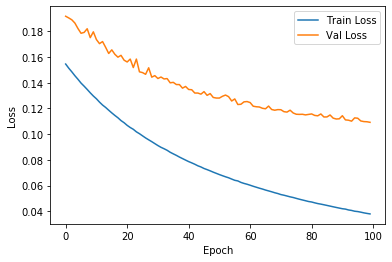

In [0]:
plot_history(history2)
print("Using Adagrad, time consumed is " + str(end2) + " seconds")

train accuracy is 0.9921Validation accuracy is: 0.9669


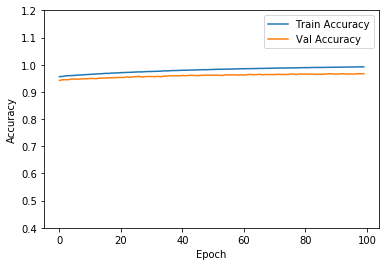

In [0]:
plot_historyAcc(history2)
print("train accuracy is " + str(history2.history['acc'][-1]) + "Validation accuracy is: " + str(history2.history['val_acc'][-1]))

Using RMSprop, time consumed is 420.185434 seconds


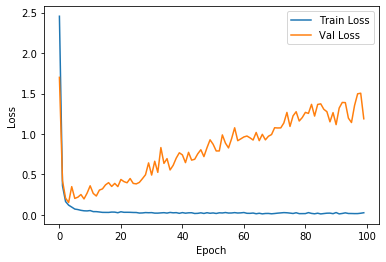

In [0]:
plot_history(history3)
print("Using RMSprop, time consumed is " + str(end3) + " seconds")

train accuracy is 0.99845Validation accuracy is: 0.9751


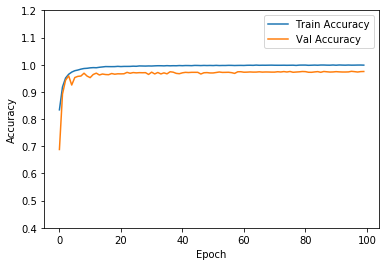

In [0]:
plot_historyAcc(history3)
print("train accuracy is " + str(history3.history['acc'][-1]) + "Validation accuracy is: " + str(history3.history['val_acc'][-1]))

Using Adam, time consumed is 1223.4244039999999 seconds


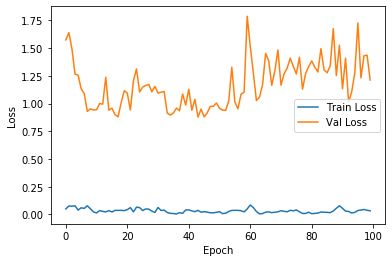

In [0]:
plot_history(history4)
print("Using Adam, time consumed is " + str(end4) + " seconds")

train accuracy is 0.997575Validation accuracy is: 0.9723


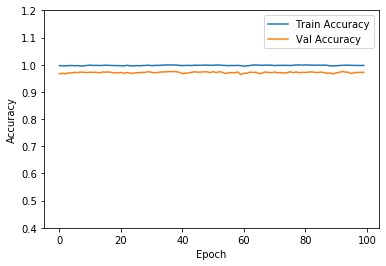

In [0]:
plot_historyAcc(history4)
print("train accuracy is " + str(history4.history['acc'][-1]) + "Validation accuracy is: " + str(history4.history['val_acc'][-1]))

# Hyperparameter tuning

When designing the architecture for an artificial neural network, there exist a variety of parameters that can be tuned. It is indeed an art in itself to find the right combination for these parameters to achieve the highest accuracy. 

Talos was released on May 11, 2018 and has since been upgraded seven times. It works for Python 2 and Python 3, and follows a POD (Prepare, Optimize, Deploy) workflow, to create a flexible and efficient pipeline with state-of-the-art prediction results. When running the code with Talos in the scan-command, all possible combinations are tested in one experiment. The best model is then saved and can be applied just like if you made a neural network using Keras.

<img src='https://raw.githubusercontent.com/autonomio/hyperio/master/logo.png' width=250px>

In [1]:
!pip install talos

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 8.7MB 12.9MB/s 
     |████████████████████████████████| 109.2MB 27kB/s 
     |████████████████████████████████| 378kB 47.1MB/s 
     |████████████████████████████████| 3.2MB 51.8MB/s 
     |████████████████████████████████| 491kB 57.7MB/s 
     |████████████████████████████████| 839kB 75.6MB/s 
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-cp36-none-any.whl size=3601 sha256=0d8baeb1d2faf0aa75166cf9774e3769acdf9243a3879846ad5c6a841f571482
  Stored in directory: /root/.cache/pip/wheels/9d/d3/8c/9503a22b0a38e8b21c70ad834e4606d209193443e5c709305d
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=8969694673c515dede4e26874eabde88f0ec509d76467e7db558127f8f00bca3
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 

## **RESTART RUNTIME NOW**

In [1]:
import talos
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


## Table of Contents

##### 1. <a href=#one>Data Preparation</a>
##### 2. <a href=#two>Model Preparation</a>
##### 3. <a href=#three>Setting the Parameter Space Boundaries</a>
##### 4. <a href=#four>Run the Hyperparameter <code>Scan()</code></a>
##### 5. <a href=#five>Access the results through the <code>Scan</code> object</a>
##### 6. <a href=#six>Analysing the Scan results with <code>Reporting()</code></a>
##### 7. <a href=#seven>Evaluating Models with <code>Evaluate()</code></a>
##### 8. <a href=#eight>Deploying Models with <code>Deploy()</code></a>
##### 9. <a href=#nine>Restoring Models with <code>Restore()</code></a>

### 1. Data Preparation <a name="one"></a> 

For this experiment, we're going to use the famous Iris dataset. 

In [0]:
x, y = talos.templates.datasets.iris()

### 2. Model Preparation  <a name="two"></a> 
Talos works with any Keras model, without changing the structure of the model in anyway, or without introducing any new syntax. The below example shows clearly how this works. 

For this example, we have to import two helper functions from Talos, one for early stopping callout, and the other for using normalized learning rate values. Because we might want to work on trying out several optimizers in a single scan, without normalization, inputting of the values would become cumbersome.

In [0]:
from talos.utils import lr_normalizer

Note that the only difference in the model below is how instead of using a label or value to define a given model parameter, we do it using a dictionary label. Also for optimizer we are using a learning rate parameter, which involves the use of two dictionary labels.

In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Dense

def iris_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation='relu'))
    
    model.add(Dropout(params['dropout']))
    model.add(Dense(y_train.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    validation_data=[x_val, y_val])
    
    return out, model 

### 3. Setting the Parameter Space Boundaries <a name="three"></a> 
In the last and final step, we're going to create the dictionary, which will then be passed on to Talos together with the model above. Here we have three different ways to input values:

- as stepped ranges (min, max, steps)
- as multiple values [in a list]
- as a single value [in a list]

For values we don't want to use, it's ok to set it as None.

NOTE: at this point you have to import from Keras the optimizer, activations, and losses you want to scan for.

In [0]:
from keras.optimizers import Adam, SGD
from keras.activations import softmax
from keras.losses import categorical_crossentropy, logcosh

p = {'lr': (0.1, 10, 10),
     'first_neuron':[4, 8, 16, 32, 64, 128],
     'batch_size': [2, 3, 4],
     'epochs': [200],
     'dropout': (0, 0.40, 10),
     'optimizer': [Adam, SGD],
     'loss': ['categorical_crossentropy'],
     'last_activation': ['softmax'],
     'weight_regulizer': [None]}

### 4. Run the Hyperparameter <code>Scan()</code> <a name="four"></a> 
The experiment is configured and started through the Scan() command. All of the options effecting the experiment, other than the hyperparameters themselves, are configured through the Scan arguments.

Now we are ready to run the model based on the parameters and the layer configuration above. The exact same process would apply with any other model, just make sure to pass the model function name in the Scan() command as in the below example. To get started quickly, we're going to invoke the 'grid_downsample' parameter to 1/100 of the entire permutations.

In [0]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=iris_model,
                         experiment_name='iris',
                         fraction_limit=.01)


100%|██████████| 36/36 [04:58<00:00,  9.25s/it]


### 5. Access the results through the <code>Scan</code> object <a name="five"></a> 

In [0]:
# accessing the results data frame
scan_object.data.head()

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,last_activation,loss,lr,optimizer,weight_regulizer
0,200,0.039371,0.955556,0.063971,0.971429,3,0.04,200,16,softmax,categorical_crossentropy,8.02,<class 'keras.optimizers.Adam'>,None
1,200,0.080041,0.977778,0.114343,0.971429,2,0.24,200,32,softmax,categorical_crossentropy,1.09,<class 'keras.optimizers.SGD'>,None
2,200,0.093586,0.977778,0.219337,0.904762,4,0.20,200,32,softmax,categorical_crossentropy,5.05,<class 'keras.optimizers.SGD'>,None
3,200,0.039226,0.977778,0.078665,0.952381,3,0.20,200,128,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.Adam'>,None
4,200,0.041673,0.977778,0.087682,0.961905,4,0.36,200,64,softmax,categorical_crossentropy,6.04,<class 'keras.optimizers.Adam'>,None


In [0]:
# access the summary details
scan_object.details

experiment_name                    iris
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            03/09/20/09:30
x_shape                        (150, 4)
y_shape                        (150, 3)
dtype: object

In addition to statistics and meta-data related with the Scan, the used data (x and y) together with the saved model and model weights for each hyperparameter permutation is stored in the Scan object. 

In [0]:
# accessing the saved models
scan_object.saved_models

In [0]:
# accessing the saved weights for models
scan_object.saved_weights

The Scan object can be further used, and is required, as input for Predict(), Evaluate(), and Deploy(). More about this in the corresponding sections below.

### 6. Analysing the Scan results with <code>Reporting()</code> <a name="six"></a> 

In the Scan process, the results are stored round-by-round in the corresponding experiment log which is a .csv file stored in the present working directory. The Reporting() accepts as its source either a file name, or the Scan object. 

In [0]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)

In [0]:
# access the dataframe with the results
analyze_object.data

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,last_activation,loss,lr,optimizer,weight_regulizer
0,200,0.039371,0.955556,0.063971,0.971429,3,0.04,200,16,softmax,categorical_crossentropy,8.02,<class 'keras.optimizers.Adam'>,None
1,200,0.080041,0.977778,0.114343,0.971429,2,0.24,200,32,softmax,categorical_crossentropy,1.09,<class 'keras.optimizers.SGD'>,None
2,200,0.093586,0.977778,0.219337,0.904762,4,0.20,200,32,softmax,categorical_crossentropy,5.05,<class 'keras.optimizers.SGD'>,None
3,200,0.039226,0.977778,0.078665,0.952381,3,0.20,200,128,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.Adam'>,None
4,200,0.041673,0.977778,0.087682,0.961905,4,0.36,200,64,softmax,categorical_crossentropy,6.04,<class 'keras.optimizers.Adam'>,None
5,200,0.047551,0.977778,0.092171,0.942857,2,0.04,200,32,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.Adam'>,None
6,200,0.039422,0.955556,0.061460,0.980952,2,0.20,200,32,softmax,categorical_crossentropy,3.07,<class 'keras.optimizers.Adam'>,None
7,200,0.100895,0.977778,0.378910,0.876190,3,0.08,200,4,softmax,categorical_crossentropy,4.06,<class 'keras.optimizers.SGD'>,None
8,200,0.048926,0.977778,0.171069,0.923810,3,0.20,200,8,softmax,categorical_crossentropy,7.03,<class 'keras.optimizers.Adam'>,None
9,200,0.038288,0.977778,0.066376,0.990476,3,0.00,200,16,softmax,categorical_crossentropy,8.02,<class 'keras.optimizers.Adam'>,None


In [0]:
# get the number of rounds in the Scan
analyze_object.rounds()

36

In [0]:
# get the highest result for any metric
analyze_object.high('val_acc')

1.0

In [0]:
# get the round with the best result
analyze_object.rounds2high('val_acc')

35

In [0]:
# get the best paramaters
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'])

array([[200, 200, 4, 4.0600000000000005, None, 'softmax', 0.0, 2,
        <class 'keras.optimizers.Adam'>, 0],
       [200, 200, 32, 5.05, None, 'softmax', 0.16, 4,
        <class 'keras.optimizers.SGD'>, 1],
       [200, 200, 64, 6.04, None, 'softmax', 0.28, 2,
        <class 'keras.optimizers.Adam'>, 2],
       [200, 200, 32, 3.0700000000000003, None, 'softmax', 0.24, 2,
        <class 'keras.optimizers.Adam'>, 3],
       [200, 200, 16, 8.020000000000001, None, 'softmax', 0.0, 4,
        <class 'keras.optimizers.Adam'>, 4],
       [200, 200, 32, 0.1, None, 'softmax', 0.0, 4,
        <class 'keras.optimizers.SGD'>, 5],
       [200, 200, 128, 3.0700000000000003, None, 'softmax', 0.08, 3,
        <class 'keras.optimizers.SGD'>, 6],
       [200, 200, 4, 2.08, None, 'softmax', 0.0, 4,
        <class 'keras.optimizers.SGD'>, 7],
       [200, 200, 128, 4.0600000000000005, None, 'softmax', 0.08, 3,
        <class 'keras.optimizers.Adam'>, 8],
       [200, 200, 8, 1.09, None, 'softmax', 0.36,

In addition to the key obsevations, several useful plots are available for analysis of the results.

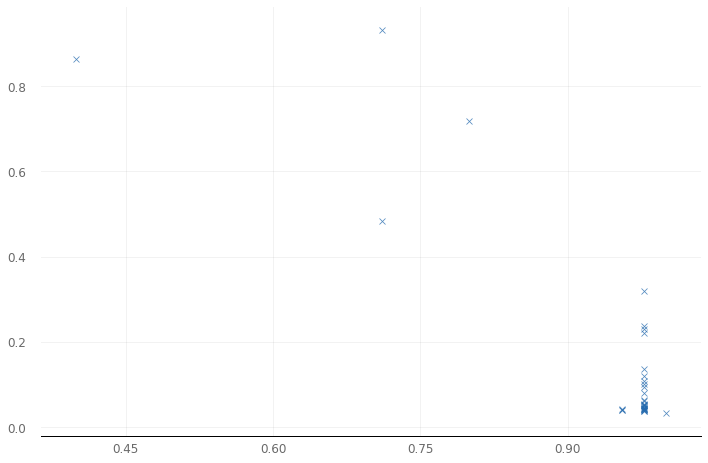

In [0]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_acc', 'val_loss')

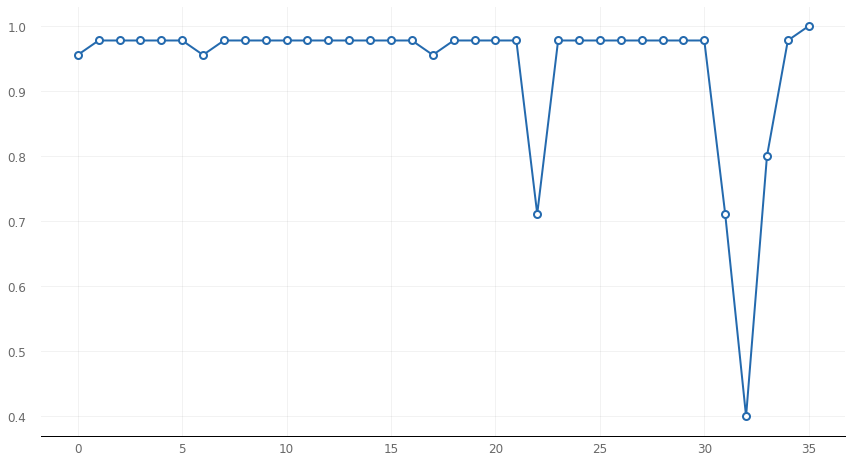

In [0]:
# line plot
analyze_object.plot_line('val_acc')

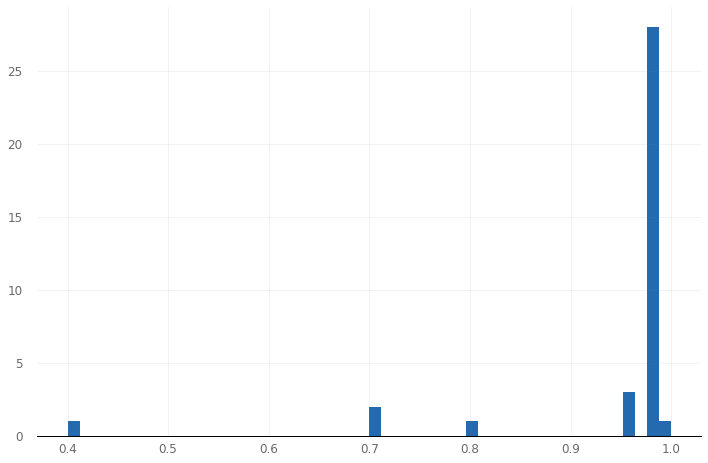

In [0]:
# a simple histogram
analyze_object.plot_hist('val_acc', bins=50)

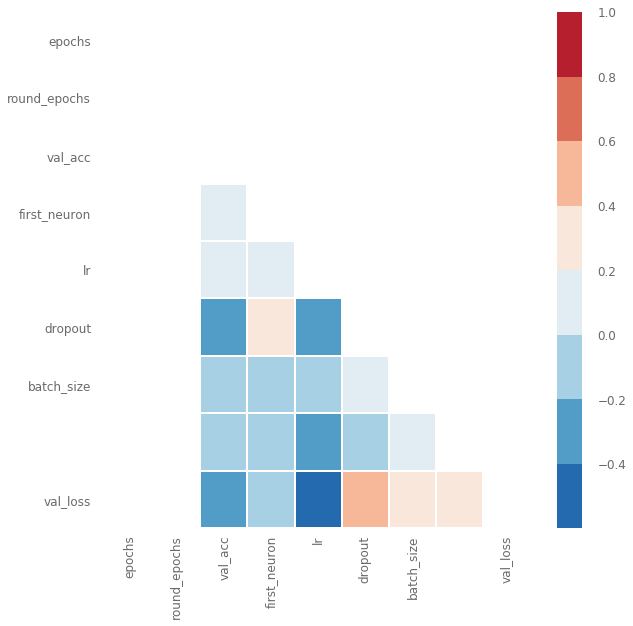

In [0]:
# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

### 7. Evaluating Models with <code>Evaluate()</code> <a name="seven"></a> 

Models can be evaluated with <code>Evaluate()</code> against a k-fold cross-validation. Ideally at least 50% of the data, or more if possible, is kept completely out of the <code>Scan</code> process and only exposed into Evaluate once one or more candidate models have been identified.

In [0]:
evaluate_object = talos.Evaluate(scan_object)
evaluate_object.evaluate(x, y, folds=10, metric='val_acc', task='multi_label')

[1.0, 1.0, 1.0, 0.9137254901960784, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Once a sufficiently performing model have been found, a deployment package can be easily created.

### 8. Deploying Models with <code>Deploy()</code> <a name="eight"></a> 

Once the right model or models have been found, you can create a deployment package with <code>Deploy()</code> which is then easy to transfer to a production or other environment, send via email, or upload to shared remote location. Best model is automatically chosen based on a given metric ('val_acc' by default).

The Deploy package is a zip file that consist of: 

- details of the scan
- model weights
- model json
- results of the experiment
- sample of x data
- sample of y data

The <code>Deploy</code> package can be easily restored with <code>Restore()</code> which is covered in the next section.

In [0]:
talos.Deploy(scan_object=scan_object, model_name='iris_deploy', metric='val_acc');

Deploy package iris_deploy have been saved.


### 9. Restoring Models with <code>Restore()</code> <a name="nine"></a> 

In [0]:
iris = talos.Restore('iris_deploy.zip')

The <code>Restore</code> object now consists of the assets from the Scan object originally associated with the experiment, together with the model that had been picked as 'best'. The model can be immediately used for making prediction, or use in any other other way Keras model objects can be used.

In [0]:
# make predictions with the model
model = iris.model
model.predict(x)

In [0]:
# get the hyperparameter space boundary
iris.params

{'batch_size': [2, 3, 4],
 'dropout': (0, 0.4, 10),
 'epochs': [200],
 'first_neuron': [4, 8, 16, 32, 64, 128],
 'last_activation': ['softmax'],
 'loss': ['categorical_crossentropy'],
 'lr': (0.1, 10, 10),
 'optimizer': [keras.optimizers.Adam, keras.optimizers.SGD],
 'weight_regulizer': [None]}

In [0]:
# sample of x and y data
iris.x
iris.y

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
95,1.0,0.0,0.0
96,1.0,0.0,0.0
97,0.0,0.0,1.0
98,0.0,1.0,0.0


In [0]:
# the results dataframe
iris.results

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,last_activation,loss.1,lr,optimizer,weight_regulizer,Unnamed: 15
0,200,0.039371,0.955556,0.063971,0.971429,3,0.04,200,16,softmax,categorical_crossentropy,8.02,<class 'keras.optimizers.Adam'>,NaN,0
1,200,0.080041,0.977778,0.114343,0.971429,2,0.24,200,32,softmax,categorical_crossentropy,1.09,<class 'keras.optimizers.SGD'>,NaN,1
2,200,0.093586,0.977778,0.219337,0.904762,4,0.20,200,32,softmax,categorical_crossentropy,5.05,<class 'keras.optimizers.SGD'>,NaN,2
3,200,0.039226,0.977778,0.078665,0.952381,3,0.20,200,128,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.Adam'>,NaN,3
4,200,0.041673,0.977778,0.087682,0.961905,4,0.36,200,64,softmax,categorical_crossentropy,6.04,<class 'keras.optimizers.Adam'>,NaN,4
5,200,0.047551,0.977778,0.092171,0.942857,2,0.04,200,32,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.Adam'>,NaN,5
6,200,0.039422,0.955556,0.061460,0.980952,2,0.20,200,32,softmax,categorical_crossentropy,3.07,<class 'keras.optimizers.Adam'>,NaN,6
7,200,0.100895,0.977778,0.378910,0.876190,3,0.08,200,4,softmax,categorical_crossentropy,4.06,<class 'keras.optimizers.SGD'>,NaN,7
8,200,0.048926,0.977778,0.171069,0.923810,3,0.20,200,8,softmax,categorical_crossentropy,7.03,<class 'keras.optimizers.Adam'>,NaN,8
9,200,0.038288,0.977778,0.066376,0.990476,3,0.00,200,16,softmax,categorical_crossentropy,8.02,<class 'keras.optimizers.Adam'>,NaN,9


# Exercise

Use talos hyperparameter optimization to search for the best model parameters to use for California housing dataset. 


In [0]:
!pip install talos

     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 8.7MB 24.0MB/s 
     |████████████████████████████████| 378kB 67.7MB/s 
     |████████████████████████████████| 109.2MB 46.6MB/s 
     |████████████████████████████████| 3.2MB 51.2MB/s 
     |████████████████████████████████| 491kB 51.8MB/s 
     |████████████████████████████████| 839kB 56.8MB/s 
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 sha256=14ddc94123700baab43fb410be193835598cebbd30edee0f3d2cd1e1cf67fff4
  Stored in directory: /root/.cache/pip/wheels/75/33/46/c871b94249bd57d17797d049b3dff8e3a09c315afb67eb14c6
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=ec6d373216db681af63ddd06302f54434dc71fd270fc50f5a9367fc428e84ef5
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-cp36-none-any.whl size=360

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import talos
from talos.utils import lr_normalizer

In [0]:
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 

In [7]:
dataset = fetch_california_housing() 

In [8]:
x=dataset.data
x.shape

(20640, 8)

In [0]:
y=dataset.target

In [10]:
y.shape

(20640,)

In [11]:
xtrain, xval, ytrain, yval = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 1)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [12]:
ytrain = ytrain.reshape(-1,1)
ytrain.shape

(16512, 1)

In [13]:
xtrain[0]

array([   3.1908    ,   52.        ,    5.        ,    1.0141844 ,
        879.        ,    3.11702128,   37.71      , -122.43      ])

'### To be Done ###'

Define your model here and search for the best hyperparameters to use using talos. 

Report the parameters of the best model and its validation accuracy

In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Dense
def california_model(x_train, y_train, x_val, y_val, params):
  model = Sequential() 
  model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation='relu'))
    
  model.add(Dropout(params['dropout']))
  model.add(Dense(ytrain.shape[1],activation='linear'))
  opt=SGD(lr=0.01,momentum=0.9)
          
   
  model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])
  out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    validation_data=[x_val, y_val])
    
  return out, model


In [0]:
from keras.optimizers import Adam, SGD
from keras.activations import softmax
from keras.losses import categorical_crossentropy, logcosh
from keras.losses import  mean_squared_error

p = {'lr': (0.1, 1, 5),
     'first_neuron':[4, 8,128, 300],
     'batch_size': [64, 128, 512],
     'epochs': [200],
     'dropout': (0, 0.40, 10),
     'optimizer': [Adam, SGD],
     'loss': ['mean_squared_error'],
     
     'weight_regulizer': [None]}

In [0]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=california_model,
                         experiment_name='california',
                         fraction_limit=.01)



  0%|          | 0/12 [00:00<?, ?it/s]



  8%|▊         | 1/12 [00:20<03:49, 20.87s/it]

 17%|█▋        | 2/12 [01:20<05:25, 32.57s/it]

 25%|██▌       | 3/12 [02:32<06:37, 44.18s/it]

 33%|███▎      | 4/12 [04:48<09:35, 71.94s/it]

 42%|████▏     | 5/12 [07:06<10:42, 91.73s/it]

 50%|█████     | 6/12 [09:00<09:49, 98.28s/it]

 58%|█████▊    | 7/12 [10:11<07:30, 90.06s/it]

 67%|██████▋   | 8/12 [11:19<05:34, 83.68s/it]

 75%|███████▌  | 9/12 [11:40<03:13, 64.66s/it]

 83%|████████▎ | 10/12 [13:34<02:38, 79.44s/it]

 92%|█████████▏| 11/12 [13:51<01:00, 60.79s/it]

100%|██████████| 12/12 [14:12<00:00, 48.76s/it]



In [0]:
scan_object.data

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,loss,lr,optimizer,weight_regulizer
0,200,NaN,0.000000,NaN,0.000000,512,0.32,200,128,mean_squared_error,0.64,<class 'keras.optimizers.SGD'>,None
1,200,1.298564,0.002261,1.345778,0.002215,128,0.16,200,8,mean_squared_error,0.82,<class 'keras.optimizers.SGD'>,None
2,200,0.764652,0.003552,1.026882,0.003876,128,0.32,200,8,mean_squared_error,0.10,<class 'keras.optimizers.Adam'>,None
3,200,0.522189,0.004037,0.534029,0.004499,64,0.08,200,128,mean_squared_error,0.10,<class 'keras.optimizers.Adam'>,None
4,200,0.479186,0.004037,0.523654,0.004638,64,0.12,200,128,mean_squared_error,0.64,<class 'keras.optimizers.Adam'>,None
5,200,NaN,0.000000,NaN,0.000000,64,0.08,200,300,mean_squared_error,0.46,<class 'keras.optimizers.SGD'>,None
6,200,1.299154,0.002261,1.353023,0.002215,128,0.28,200,8,mean_squared_error,0.28,<class 'keras.optimizers.Adam'>,None
7,200,2.126380,0.002584,0.787201,0.002492,128,0.20,200,4,mean_squared_error,0.64,<class 'keras.optimizers.Adam'>,None
8,200,2.473787,0.002261,7.495024,0.001730,512,0.08,200,4,mean_squared_error,0.64,<class 'keras.optimizers.Adam'>,None
9,200,1.298719,0.002261,1.345782,0.002215,64,0.04,200,8,mean_squared_error,0.28,<class 'keras.optimizers.SGD'>,None


## After seeing the results , I decided to modify the scanned parameters. 

In [0]:
p = {'lr': (0.1,0.7, 5) ,
     'first_neuron':[128,256, 512],
     'batch_size': [128, 512,1024],
     'epochs': [200],
     'dropout': (0, 0.30, 5),
     'optimizer': [Adam],
     'loss': ['mean_squared_error'],
     
     'weight_regulizer': [None]}

In [21]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=california_model,
                         experiment_name='california',
                         fraction_limit=.1)

100%|██████████| 22/22 [10:42<00:00, 35.47s/it]


In [22]:
scan_object.data

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,loss,lr,optimizer,weight_regulizer
0,200,0.627942,0.003068,0.630347,0.004222,1024,0.00,200,256,mean_squared_error,0.46,<class 'keras.optimizers.Adam'>,None
1,200,0.533720,0.003875,0.514140,0.003945,512,0.00,200,512,mean_squared_error,0.10,<class 'keras.optimizers.Adam'>,None
2,200,2.181199,0.002099,580.227590,0.000623,1024,0.06,200,128,mean_squared_error,0.10,<class 'keras.optimizers.Adam'>,None
3,200,0.576541,0.003552,0.757265,0.003392,512,0.24,200,256,mean_squared_error,0.46,<class 'keras.optimizers.Adam'>,None
4,200,5.235356,0.001776,592.400666,0.000277,512,0.06,200,128,mean_squared_error,0.10,<class 'keras.optimizers.Adam'>,None
5,200,1.011881,0.003229,37.006132,0.001384,512,0.12,200,128,mean_squared_error,0.10,<class 'keras.optimizers.Adam'>,None
6,200,0.689052,0.003229,8.957606,0.002700,512,0.06,200,512,mean_squared_error,0.22,<class 'keras.optimizers.Adam'>,None
7,200,1.345689,0.002584,1.568919,0.002700,512,0.00,200,256,mean_squared_error,0.46,<class 'keras.optimizers.Adam'>,None
8,200,0.591509,0.003391,0.777561,0.004015,512,0.06,200,512,mean_squared_error,0.46,<class 'keras.optimizers.Adam'>,None
9,200,0.578754,0.003875,0.563578,0.003876,1024,0.00,200,256,mean_squared_error,0.22,<class 'keras.optimizers.Adam'>,None


In [26]:
analyze_object = talos.Analyze(scan_object)
analyze_object.low('val_loss')

0.453370826758881

## Best Parameters out of tried ones  for val_accuracy =0.453 and training_acc=0.503  are 128 batch_size , 0.18 for dropout ,512 neurons, 0.58 for learning rate , Adam for optimizer .
